## Patient EDA

In [25]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import deltalake
import matplotlib.pyplot as plt

In [3]:
%%bash
python generate_patients.py 100 --seed 42

In [6]:
%%bash
ls -l data

total 48
-rw-r--r--  1 zacklarsen  staff  9609 Jul 24 08:32 patients.delta
-rw-r--r--  1 zacklarsen  staff  9609 Jul 24 08:32 patients.parquet


In [8]:
table = pq.read_table('data/patients.parquet')

In [9]:
print(table.schema)

patient_name: string
patient_id: int64
patient_age: int64
patient_gender: string
current_clinical_risk: string
has_high_acuity: bool
has_moderate_acuity: bool
has_severe_disease: bool
has_moderate_disease: bool
needs_stabilization: bool
-- schema metadata --
pandas: '{"index_columns": [], "column_indexes": [], "columns": [{"name":' + 1362


In [38]:
# Create a PyArrow filesystem object
fs = pa.fs.LocalFileSystem()

In [39]:
pyarrow_patients = pq.read_table(source='data/patients.delta', filesystem=fs)

In [40]:
print(pyarrow_patients.schema)

patient_name: string
patient_id: int64
patient_age: int64
patient_gender: string
current_clinical_risk: string
has_high_acuity: bool
has_moderate_acuity: bool
has_severe_disease: bool
has_moderate_disease: bool
needs_stabilization: bool
-- schema metadata --
pandas: '{"index_columns": [], "column_indexes": [], "columns": [{"name":' + 1362


In [41]:
pyarrow_patients

pyarrow.Table
patient_name: string
patient_id: int64
patient_age: int64
patient_gender: string
current_clinical_risk: string
has_high_acuity: bool
has_moderate_acuity: bool
has_severe_disease: bool
has_moderate_disease: bool
needs_stabilization: bool
----
patient_name: [["Allison Hill","Noah Rhodes","Angie Henderson","Daniel Wagner","Cristian Santos",...,"Anna Henderson","Aaron Wise","Deborah Figueroa","Jessica Smith","Stephen Mckee"]]
patient_id: [[685823118,138684919,996139578,496442646,725464884,...,224173718,513600440,719106699,304095531,373506211]]
patient_age: [[6,91,56,1,67,...,52,32,19,84,89]]
patient_gender: [["Male","Male","Female","Male","Male",...,"Male","Male","Male","Male","Male"]]
current_clinical_risk: [["Moderate","High","Moderate","Moderate","Moderate",...,"High","Moderate","Low","High","Moderate"]]
has_high_acuity: [[false,false,false,false,false,...,true,false,false,false,false]]
has_moderate_acuity: [[false,false,true,false,false,...,false,true,false,true,false]]
h

In [42]:
pyarrow_patients.to_pandas().head()

,patient_name,patient_id,patient_age,patient_gender,current_clinical_risk,has_high_acuity,has_moderate_acuity,has_severe_disease,has_moderate_disease,needs_stabilization
0,Allison Hill,685823118,6,Male,Moderate,False,False,False,False,False
1,Noah Rhodes,138684919,91,Male,High,False,False,False,False,False
2,Angie Henderson,996139578,56,Female,Moderate,False,True,False,False,True
3,Daniel Wagner,496442646,1,Male,Moderate,False,False,False,True,False
4,Cristian Santos,725464884,67,Male,Moderate,False,False,False,False,False


In [43]:
# Get the frequency counts of each value in the binary columns
high_acuity_counts = pyarrow_patients.to_pandas()['has_high_acuity'].value_counts()
moderate_acuity_counts = pyarrow_patients.to_pandas()['has_moderate_acuity'].value_counts()

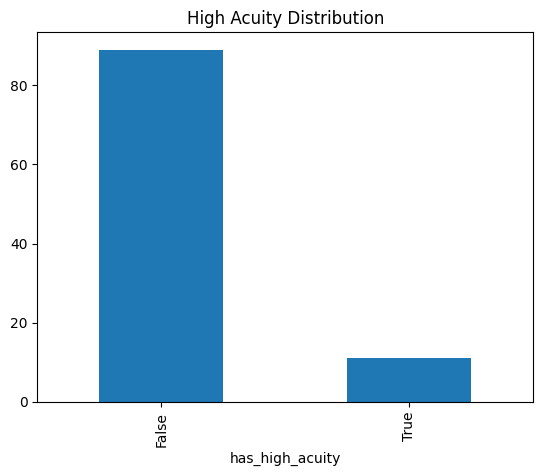

In [44]:
high_acuity_counts.plot(kind='bar', title='High Acuity Distribution')
plt.show()

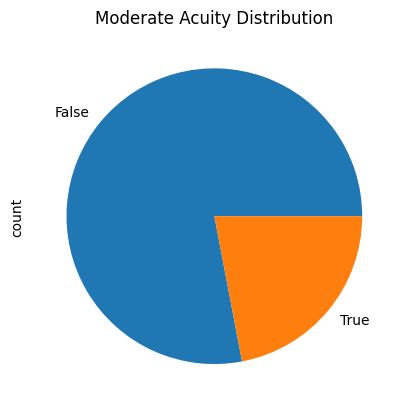

In [45]:
moderate_acuity_counts.plot(kind='pie', title='Moderate Acuity Distribution')
plt.show()

In [46]:
# Load the Delta table
delta_patients = deltalake.DeltaTable("data/patients.delta")

OSError: Generic LocalFileSystem error: Unable to open file /Users/zacklarsen/Documents/Documents - Zack’s Mac mini/Projects/copilot-priority/data/patients.delta/_delta_log/_last_checkpoint: Not a directory (os error 20)

In [ ]:
# Get the version number of the Delta table
delta_patients.version()

AttributeError: 'pyarrow.lib.Table' object has no attribute 'version'